In [1]:
import pandas as pd
# reading dataset
data = pd.read_csv("grid/grid-export.csv")

data.tail()

,Day,PM1(mcg/m³),PM10(mcg/m³),PM2.5(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
434,2022-08-28,6.20,70.48,16.81,59.52,8.89,27.58,0.0,21.67,24.34,31.41
435,2022-08-29,5.39,66.65,15.50,55.99,28.52,34.23,0.0,20.19,23.77,35.32
436,2022-08-30,5.11,64.76,14.81,54.21,5.69,30.39,0.0,19.31,23.57,36.31
437,2022-08-31,5.58,69.77,15.52,56.70,3.86,27.57,0.0,18.83,24.97,32.14
438,2022-09-01,5.63,71.57,16.26,58.86,4.77,28.98,0.0,20.86,25.68,31.01


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              439 non-null    object 
 1   PM1(mcg/m³)      439 non-null    float64
 2   PM10(mcg/m³)     439 non-null    float64
 3   PM2.5(mcg/m³)    439 non-null    float64
 4   AQI US           439 non-null    float64
 5   NO(mcg/m³)       439 non-null    float64
 6   NO2(mcg/m³)      439 non-null    float64
 7   CH2O(mcg/m³)     439 non-null    float64
 8   SO2(mcg/m³)      439 non-null    float64
 9   Temperature(°C)  439 non-null    float64
 10  Humidity(%)      439 non-null    float64
dtypes: float64(10), object(1)
memory usage: 37.9+ KB


In [3]:
# Prepring dataset

In [4]:
data['Day'] = pd.to_datetime(data['Day'])

In [5]:
# Preparing for pm1 training the model and testing it

In [6]:
pm1 = data.drop('PM10(mcg/m³)', axis=1)
pm1 = pm1.drop('PM2.5(mcg/m³)', axis = 1)
pm1 = pm1.drop('Day', axis=1)

In [8]:
pm1.tail()

,PM1(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
434,6.20,59.52,8.89,27.58,0.0,21.67,24.34,31.41
435,5.39,55.99,28.52,34.23,0.0,20.19,23.77,35.32
436,5.11,54.21,5.69,30.39,0.0,19.31,23.57,36.31
437,5.58,56.70,3.86,27.57,0.0,18.83,24.97,32.14
438,5.63,58.86,4.77,28.98,0.0,20.86,25.68,31.01


In [7]:
X = pm1.drop('PM1(mcg/m³)', axis=1)
Y = pm1['PM1(mcg/m³)']

In [8]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [9]:
import lightgbm as lgb

# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

In [10]:
# Making predictions
reg_pred = model_reg.predict(X_test)

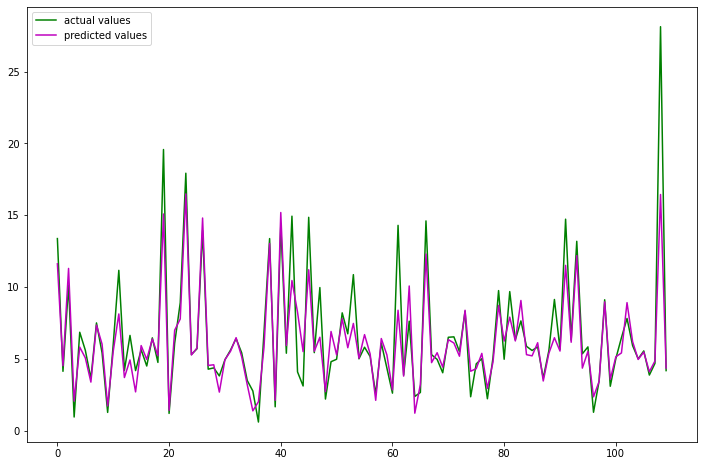

In [11]:
# importing the module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [12]:
#importing the r-square score
from sklearn.metrics import r2_score

# calculating the r score 
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.8138405694367675


In [13]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, reg_pred))



1.0275259575950282


In [14]:
# printing the mean squared error
print(mean_squared_error(y_test, reg_pred))

3.3211580726936316


In [15]:
# on training dataset

In [16]:
# Making predictions
reg_pred_train = model_reg.predict(X_train)

In [17]:
#importing the r-square score
from sklearn.metrics import r2_score

# calculating the r score 
print('R score is :', r2_score(y_train, reg_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, reg_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, reg_pred_train))



R score is : 0.8983586685545335
0.6098683774393775
1.4967388138421425


#### 

In [18]:
# Catboost regressor
# importing the CatBoot Regresspr
from catboost import CatBoostRegressor

# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

Learning rate set to 0.034348
0:	learn: 3.7723204	total: 49.9ms	remaining: 49.9s
1:	learn: 3.7192570	total: 51.5ms	remaining: 25.7s
2:	learn: 3.6559844	total: 53.2ms	remaining: 17.7s
3:	learn: 3.5965826	total: 54.9ms	remaining: 13.7s
4:	learn: 3.5378912	total: 56.6ms	remaining: 11.3s
5:	learn: 3.4826744	total: 58.3ms	remaining: 9.66s
6:	learn: 3.4269893	total: 60ms	remaining: 8.51s
7:	learn: 3.3754912	total: 61.7ms	remaining: 7.65s
8:	learn: 3.3196043	total: 63.7ms	remaining: 7.01s
9:	learn: 3.2786057	total: 65.4ms	remaining: 6.47s
10:	learn: 3.2280522	total: 66.9ms	remaining: 6.02s
11:	learn: 3.1808748	total: 68.6ms	remaining: 5.65s
12:	learn: 3.1374615	total: 70.2ms	remaining: 5.33s
13:	learn: 3.0957114	total: 71.9ms	remaining: 5.07s
14:	learn: 3.0539241	total: 73.2ms	remaining: 4.81s
15:	learn: 3.0108297	total: 74.5ms	remaining: 4.58s
16:	learn: 2.9644161	total: 75.8ms	remaining: 4.38s
17:	learn: 2.9248161	total: 76.8ms	remaining: 4.19s
18:	learn: 2.8858800	total: 77.8ms	remaining: 

179:	learn: 1.2041075	total: 180ms	remaining: 818ms
180:	learn: 1.2015474	total: 180ms	remaining: 815ms
181:	learn: 1.1995368	total: 181ms	remaining: 812ms
182:	learn: 1.1924964	total: 181ms	remaining: 809ms
183:	learn: 1.1878063	total: 182ms	remaining: 806ms
184:	learn: 1.1862506	total: 182ms	remaining: 804ms
185:	learn: 1.1841086	total: 183ms	remaining: 800ms
186:	learn: 1.1814372	total: 183ms	remaining: 797ms
187:	learn: 1.1787445	total: 184ms	remaining: 794ms
188:	learn: 1.1770559	total: 184ms	remaining: 791ms
189:	learn: 1.1751726	total: 185ms	remaining: 789ms
190:	learn: 1.1710879	total: 186ms	remaining: 786ms
191:	learn: 1.1690646	total: 186ms	remaining: 783ms
192:	learn: 1.1673006	total: 187ms	remaining: 780ms
193:	learn: 1.1656378	total: 187ms	remaining: 778ms
194:	learn: 1.1644285	total: 188ms	remaining: 775ms
195:	learn: 1.1609320	total: 188ms	remaining: 772ms
196:	learn: 1.1568986	total: 189ms	remaining: 770ms
197:	learn: 1.1536356	total: 190ms	remaining: 770ms
198:	learn: 

477:	learn: 0.6978310	total: 372ms	remaining: 406ms
478:	learn: 0.6968993	total: 372ms	remaining: 405ms
479:	learn: 0.6960248	total: 373ms	remaining: 404ms
480:	learn: 0.6958848	total: 373ms	remaining: 403ms
481:	learn: 0.6951243	total: 374ms	remaining: 402ms
482:	learn: 0.6931180	total: 375ms	remaining: 401ms
483:	learn: 0.6916930	total: 375ms	remaining: 400ms
484:	learn: 0.6915562	total: 376ms	remaining: 399ms
485:	learn: 0.6904361	total: 377ms	remaining: 398ms
486:	learn: 0.6886180	total: 377ms	remaining: 397ms
487:	learn: 0.6882500	total: 378ms	remaining: 396ms
488:	learn: 0.6859957	total: 378ms	remaining: 395ms
489:	learn: 0.6838174	total: 379ms	remaining: 394ms
490:	learn: 0.6830333	total: 379ms	remaining: 393ms
491:	learn: 0.6798444	total: 380ms	remaining: 392ms
492:	learn: 0.6792235	total: 381ms	remaining: 391ms
493:	learn: 0.6771753	total: 381ms	remaining: 391ms
494:	learn: 0.6756221	total: 382ms	remaining: 390ms
495:	learn: 0.6734196	total: 383ms	remaining: 389ms
496:	learn: 

771:	learn: 0.4510167	total: 553ms	remaining: 163ms
772:	learn: 0.4504103	total: 554ms	remaining: 163ms
773:	learn: 0.4498072	total: 556ms	remaining: 162ms
774:	learn: 0.4481565	total: 556ms	remaining: 161ms
775:	learn: 0.4479123	total: 557ms	remaining: 161ms
776:	learn: 0.4474342	total: 558ms	remaining: 160ms
777:	learn: 0.4465605	total: 558ms	remaining: 159ms
778:	learn: 0.4457650	total: 559ms	remaining: 159ms
779:	learn: 0.4455310	total: 559ms	remaining: 158ms
780:	learn: 0.4450492	total: 560ms	remaining: 157ms
781:	learn: 0.4437549	total: 561ms	remaining: 156ms
782:	learn: 0.4435532	total: 561ms	remaining: 156ms
783:	learn: 0.4429459	total: 562ms	remaining: 155ms
784:	learn: 0.4425378	total: 563ms	remaining: 154ms
785:	learn: 0.4424476	total: 563ms	remaining: 153ms
786:	learn: 0.4419017	total: 564ms	remaining: 153ms
787:	learn: 0.4411226	total: 564ms	remaining: 152ms
788:	learn: 0.4407009	total: 565ms	remaining: 151ms
789:	learn: 0.4402205	total: 566ms	remaining: 150ms
790:	learn: 

In [19]:
# making predictions
catboost_pred = CatBoost_rg.predict(X_test)

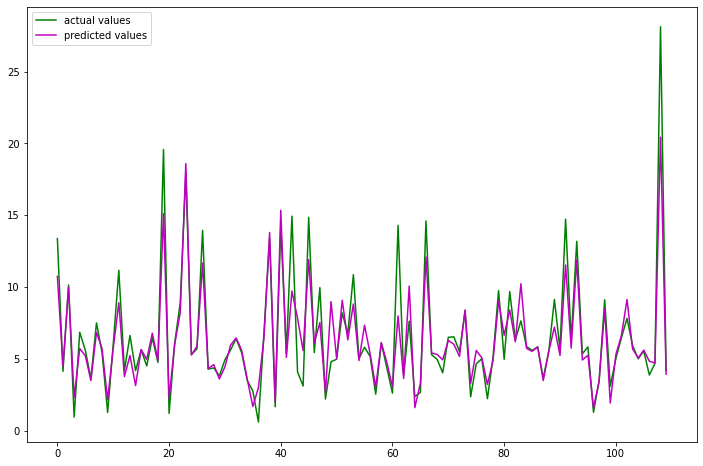

In [20]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [21]:
# calculating the r score 
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.8501841770447388


In [22]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, catboost_pred))

# printing the mean squared error
print(mean_squared_error(y_test, catboost_pred))

0.9719629270545342
2.672773698972502


In [23]:
# making predictions
catboost_pred_train = CatBoost_rg.predict(X_train)

In [24]:
# calculating the r score 
print('R score is :', r2_score(y_train, catboost_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, catboost_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, catboost_pred_train))

R score is : 0.99298000641081
0.24059235969708836
0.1033742546308637


In [25]:
# importing tensorflow module
import tensorflow as tf

# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
                                 # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])

2023-01-28 16:29:16.237731: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-28 16:29:16.401747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-28 16:29:16.401767: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-28 16:29:17.036965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [26]:
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [27]:
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 1s 2ms/step - loss: 7.6858 - mae: 7.6858
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 4.4333 - mae: 4.4333
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 3.6039 - mae: 3.6039
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 3.0303 - mae: 3.0303
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 2.7398 - mae: 2.7398
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 2.5174 - mae: 2.5174
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 2.3467 - mae: 2.3467
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 2.2371 - mae: 2.2371
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 2.1453 - mae: 2.1453
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 2.1140 - mae: 2.1140
Epoch 11/200
11/11 [==============================] - 0s 2m

11/11 [==============================] - 0s 2ms/step - loss: 1.2386 - mae: 1.2386
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2218 - mae: 1.2218
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2504 - mae: 1.2504
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2587 - mae: 1.2587
Epoch 176/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2522 - mae: 1.2522
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3009 - mae: 1.3009
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2558 - mae: 1.2558
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2341 - mae: 1.2341
Epoch 180/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2307 - mae: 1.2307
Epoch 181/200
11/11 [==============================] - 0s 2ms/step - loss: 1.2163 - mae: 1.2163
Epoch 182/200
11/11 [==============================] -

In [28]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)
y_preds_train = model.predict(X_train)

# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

11/11 [==============================] - 0s 994us/step
R score is : 0.8296901491447304


In [29]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, y_preds))

# printing the mean squared error
print(mean_squared_error(y_test, y_preds))

1.1333438899733803
3.038395284707867


In [30]:
print('R score is :', r2_score(y_train, y_preds_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_preds_train))
# printing the mean squared error
print(mean_squared_error(y_train, y_preds_train))

R score is : 0.752656750348085
1.1814433448582797
3.6423002023984266


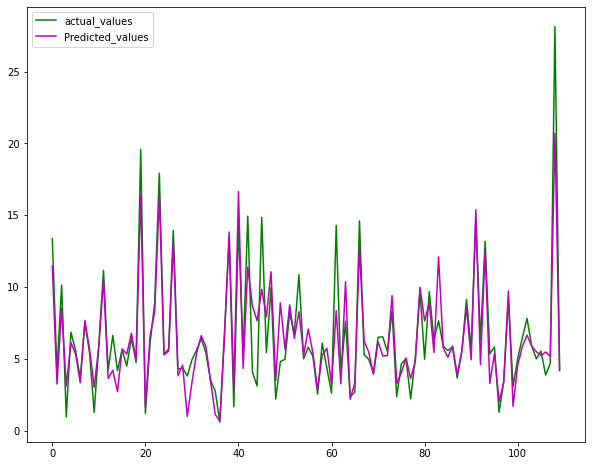

In [31]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [32]:
# importing decision tree using Python
from sklearn.tree import DecisionTreeRegressor

# initializing decision tree using Python model
regressor = DecisionTreeRegressor()

# training decision tree using Python
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [33]:
# making predictions / decision tree using Python
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

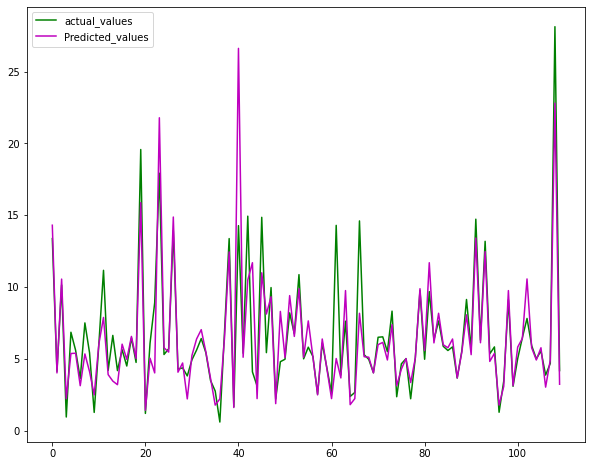

In [34]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [35]:
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_pred))

# printing the mean squared error
print(mean_squared_error(y_test, y_pred))

R score is : 0.7175175925806292
1.1798181818181819
5.0395981818181825


In [36]:
print('R score is :', r2_score(y_train, y_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, y_pred_train))

R score is : 1.0
0.0
0.0


In [37]:
# import Random forest using python
from sklearn.ensemble import RandomForestRegressor

# instantiate Random forest using python
regressor1 = RandomForestRegressor()

# fit Random forest using python model
regressor1.fit(X_train, y_train)

# making predictions for Random forest using python
y_predR = regressor1.predict(X_test)

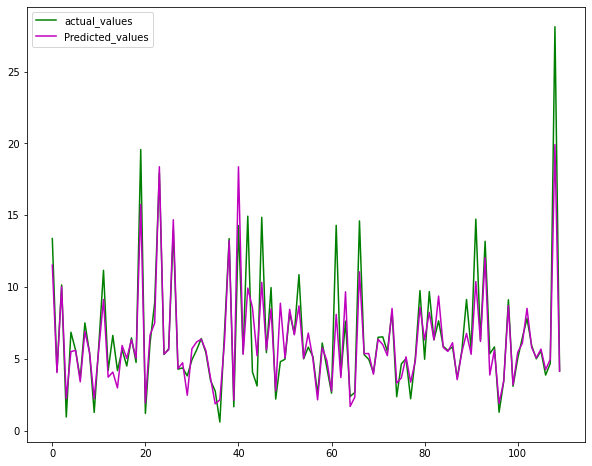

In [38]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_predR, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [39]:
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_predR))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predR))

# printing the mean squared error
print(mean_squared_error(y_test, y_predR))

R score is : 0.8351875780965397
0.9753081818181821
2.9403189719090927


In [40]:
# making predictions for Random forest using python
y_predT = regressor1.predict(X_train)

In [41]:
print('R score is :', r2_score(y_train, y_predT))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_predT))
# printing the mean squared error
print(mean_squared_error(y_train, y_predT))

R score is : 0.9630894814417666
0.4131607902735562
0.5435328815501528


In [42]:
# importing the module
from sklearn.ensemble import ExtraTreesRegressor

# initializing the model
regressor2 = ExtraTreesRegressor()

# Training the model
regressor2.fit(X_train, y_train)

# Making predictions
y_predE = regressor2.predict(X_test)

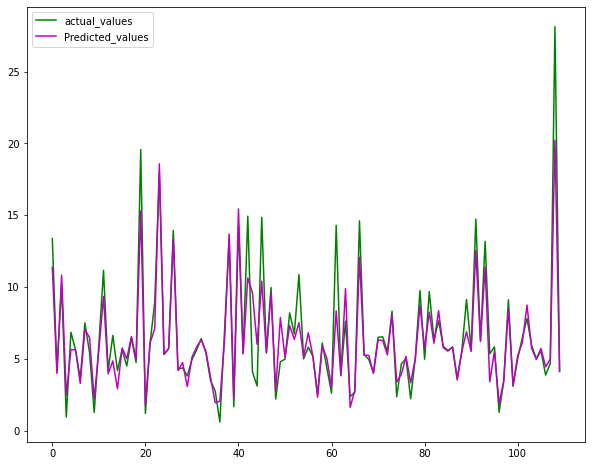

In [43]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_predE, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [44]:
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_predE))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predE))

# printing the mean squared error
print(mean_squared_error(y_test, y_predE))

R score is : 0.8545032171349147
0.9074318181818184
2.5957203108181877


In [45]:
# Making predictions
y_predET = regressor2.predict(X_train)

In [46]:
print('R score is :', r2_score(y_train, y_predET))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_predET))
# printing the mean squared error
print(mean_squared_error(y_train, y_predET))

R score is : 1.0
8.073919783337841e-15
1.1863829612651632e-28


In [47]:
# importing the module
import xgboost as xgb

# xgboost regressor
model = xgb.XGBRegressor()

# training the model
model.fit(X_train,y_train)

# making predictions
model_pred = model.predict(X_test)

In [48]:
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, model_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, model_pred))

# printing the mean squared error
print(mean_squared_error(y_test, model_pred))

R score is : 0.8551071670109279
1.0279075827165083
2.584945605501593


In [49]:
# making predictions
model_pred_train = model.predict(X_train)

In [50]:
print('R score is :', r2_score(y_train, model_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, model_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, model_pred_train))

R score is : 0.9999901571161831
0.008166554024878977
0.0001449432631326465


In [51]:
# pm2.5 regression models


In [52]:
pm2 = data.drop('PM10(mcg/m³)', axis=1)
pm2 = pm2.drop('PM1(mcg/m³)', axis = 1)
pm2 = pm2.drop('Day', axis=1)

In [53]:
X_pm = pm2.drop('PM2.5(mcg/m³)', axis=1)
Y_pm = pm2['PM2.5(mcg/m³)']

In [54]:
# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X_pm, Y_pm, test_size=0.25, random_state=0)


# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

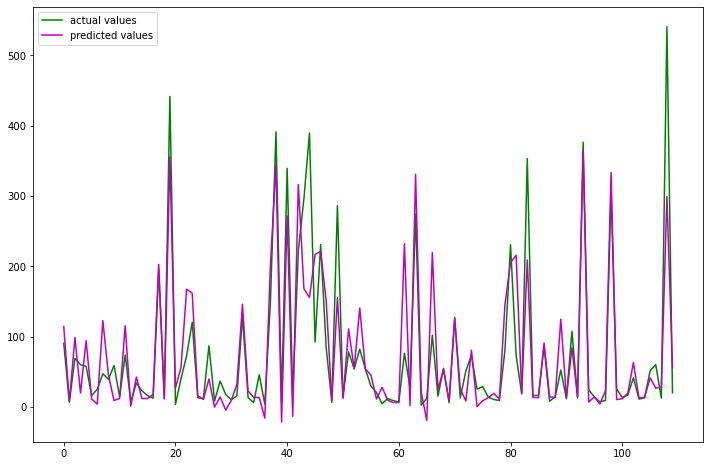

In [55]:
# Making predictions
reg_pred = model_reg.predict(X_test)


# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [56]:
# calculating the r score 
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.7445767102807783


In [57]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, reg_pred))

# printing the mean squared error
print(mean_squared_error(y_test, reg_pred))

31.791548609801804
3042.092502982969


In [58]:
# Making predictions
reg_pred_train = model_reg.predict(X_train)

In [59]:
print('R score is :', r2_score(y_train, reg_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, reg_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, reg_pred_train))

R score is : 0.9064137110633096
17.771949082765257
1260.9248511303947


In [60]:
# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

catboost_pred = CatBoost_rg.predict(X_test)

Learning rate set to 0.034348
0:	learn: 113.7231191	total: 1.35ms	remaining: 1.35s
1:	learn: 111.8926954	total: 2.34ms	remaining: 1.17s
2:	learn: 109.7608171	total: 3.29ms	remaining: 1.09s
3:	learn: 107.6242940	total: 4.21ms	remaining: 1.05s
4:	learn: 105.7852525	total: 5.15ms	remaining: 1.02s
5:	learn: 103.8981890	total: 6ms	remaining: 994ms
6:	learn: 101.9443884	total: 6.88ms	remaining: 976ms
7:	learn: 100.1816950	total: 7.77ms	remaining: 964ms
8:	learn: 98.4276263	total: 8.57ms	remaining: 944ms
9:	learn: 96.9598829	total: 9.39ms	remaining: 930ms
10:	learn: 95.2972959	total: 10.2ms	remaining: 918ms
11:	learn: 93.6105622	total: 11.1ms	remaining: 916ms
12:	learn: 92.0112300	total: 12ms	remaining: 912ms
13:	learn: 90.4355915	total: 12.9ms	remaining: 907ms
14:	learn: 89.1307447	total: 13.7ms	remaining: 900ms
15:	learn: 87.7162597	total: 14.5ms	remaining: 891ms
16:	learn: 86.5216816	total: 15.4ms	remaining: 892ms
17:	learn: 85.3526893	total: 16.2ms	remaining: 886ms
18:	learn: 84.1474664	t

250:	learn: 32.0303072	total: 178ms	remaining: 531ms
251:	learn: 31.9798701	total: 179ms	remaining: 530ms
252:	learn: 31.8680665	total: 180ms	remaining: 530ms
253:	learn: 31.8154065	total: 180ms	remaining: 530ms
254:	learn: 31.7569387	total: 181ms	remaining: 529ms
255:	learn: 31.7303403	total: 182ms	remaining: 528ms
256:	learn: 31.6328272	total: 182ms	remaining: 527ms
257:	learn: 31.5616107	total: 183ms	remaining: 526ms
258:	learn: 31.5053800	total: 184ms	remaining: 525ms
259:	learn: 31.4617316	total: 184ms	remaining: 524ms
260:	learn: 31.4187291	total: 185ms	remaining: 523ms
261:	learn: 31.3672872	total: 185ms	remaining: 522ms
262:	learn: 31.2710509	total: 186ms	remaining: 521ms
263:	learn: 31.2258329	total: 187ms	remaining: 520ms
264:	learn: 31.2162148	total: 187ms	remaining: 519ms
265:	learn: 31.1231429	total: 188ms	remaining: 519ms
266:	learn: 31.0629425	total: 189ms	remaining: 518ms
267:	learn: 31.0429820	total: 189ms	remaining: 517ms
268:	learn: 30.9913978	total: 190ms	remaining:

495:	learn: 21.5843667	total: 360ms	remaining: 366ms
496:	learn: 21.5681707	total: 361ms	remaining: 365ms
497:	learn: 21.5162446	total: 362ms	remaining: 365ms
498:	learn: 21.4057184	total: 362ms	remaining: 364ms
499:	learn: 21.3075310	total: 363ms	remaining: 363ms
500:	learn: 21.3016506	total: 364ms	remaining: 362ms
501:	learn: 21.2969440	total: 365ms	remaining: 362ms
502:	learn: 21.2703808	total: 365ms	remaining: 361ms
503:	learn: 21.2543172	total: 366ms	remaining: 360ms
504:	learn: 21.2440776	total: 366ms	remaining: 359ms
505:	learn: 21.1595394	total: 367ms	remaining: 358ms
506:	learn: 21.1367947	total: 367ms	remaining: 357ms
507:	learn: 21.0784447	total: 368ms	remaining: 356ms
508:	learn: 21.0715884	total: 369ms	remaining: 355ms
509:	learn: 21.0437345	total: 369ms	remaining: 355ms
510:	learn: 20.9464958	total: 370ms	remaining: 354ms
511:	learn: 20.9272697	total: 370ms	remaining: 353ms
512:	learn: 20.9103288	total: 371ms	remaining: 352ms
513:	learn: 20.8235722	total: 371ms	remaining:

780:	learn: 13.8081432	total: 541ms	remaining: 152ms
781:	learn: 13.7672434	total: 542ms	remaining: 151ms
782:	learn: 13.7501153	total: 543ms	remaining: 150ms
783:	learn: 13.6882120	total: 543ms	remaining: 150ms
784:	learn: 13.6736599	total: 544ms	remaining: 149ms
785:	learn: 13.6598918	total: 545ms	remaining: 148ms
786:	learn: 13.6245633	total: 545ms	remaining: 148ms
787:	learn: 13.6030525	total: 546ms	remaining: 147ms
788:	learn: 13.5724814	total: 547ms	remaining: 146ms
789:	learn: 13.5190334	total: 547ms	remaining: 145ms
790:	learn: 13.4934365	total: 548ms	remaining: 145ms
791:	learn: 13.4793170	total: 548ms	remaining: 144ms
792:	learn: 13.4542867	total: 549ms	remaining: 143ms
793:	learn: 13.4406884	total: 550ms	remaining: 143ms
794:	learn: 13.4359532	total: 551ms	remaining: 142ms
795:	learn: 13.4182467	total: 552ms	remaining: 141ms
796:	learn: 13.3839306	total: 552ms	remaining: 141ms
797:	learn: 13.3671559	total: 553ms	remaining: 140ms
798:	learn: 13.3532774	total: 554ms	remaining:

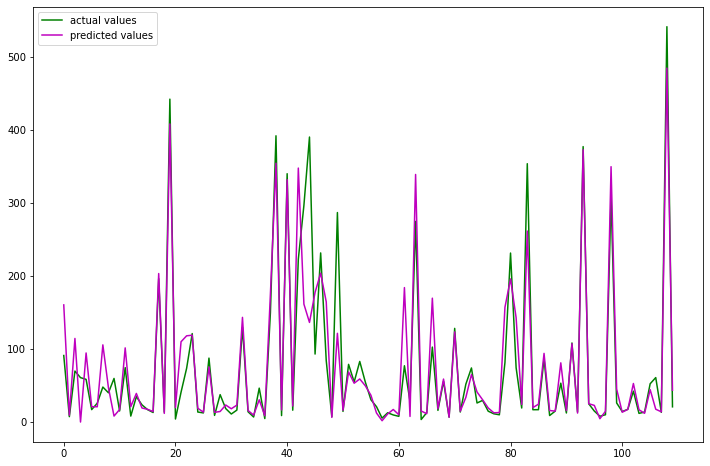

In [61]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [62]:
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.8303657382484211


In [63]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, catboost_pred))

# printing the mean squared error
print(mean_squared_error(y_test, catboost_pred))

23.622851237385852
2020.3448028987402


In [64]:
catboost_pred_train = CatBoost_rg.predict(X_train)

In [65]:
print('R score is :', r2_score(y_train, catboost_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, catboost_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, catboost_pred_train))

R score is : 0.992891099001625
6.3369127227750015
95.78101701565102


In [66]:
# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
   
                             # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 0s 1ms/step - loss: 69.4247 - mae: 69.4247
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 64.8705 - mae: 64.8705
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 61.4060 - mae: 61.4060
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 57.4794 - mae: 57.4794
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 53.6941 - mae: 53.6941
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 50.5784 - mae: 50.5784
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 48.3716 - mae: 48.3716
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 47.2708 - mae: 47.2708
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 46.3498 - mae: 46.3498
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 45.6953 - mae: 45.6953
Epoch 11/200
11/11 [===================

11/11 [==============================] - 0s 2ms/step - loss: 30.7579 - mae: 30.7579
Epoch 169/200
11/11 [==============================] - 0s 2ms/step - loss: 30.8594 - mae: 30.8594
Epoch 170/200
11/11 [==============================] - 0s 2ms/step - loss: 30.7407 - mae: 30.7407
Epoch 171/200
11/11 [==============================] - 0s 2ms/step - loss: 30.5991 - mae: 30.5991
Epoch 172/200
11/11 [==============================] - 0s 1ms/step - loss: 30.7375 - mae: 30.7375
Epoch 173/200
11/11 [==============================] - 0s 1ms/step - loss: 30.5787 - mae: 30.5787
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 30.6419 - mae: 30.6419
Epoch 175/200
11/11 [==============================] - 0s 1ms/step - loss: 30.6265 - mae: 30.6265
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 30.6321 - mae: 30.6321
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 30.5760 - mae: 30.5760
Epoch 178/200
11/11 [=============

In [67]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)

y_preds_train = model.predict(X_train)

# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

11/11 [==============================] - 0s 1ms/step
R score is : 0.7409153320656929


In [68]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, y_preds))

# printing the mean squared error
print(mean_squared_error(y_test, y_preds))

26.288950652856723
3085.699533614123


In [69]:
print('R score is :', r2_score(y_train, y_preds_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_preds_train))
# printing the mean squared error
print(mean_squared_error(y_train, y_preds_train))

R score is : 0.7082459261082104
30.158540244700333
3930.9172996223388


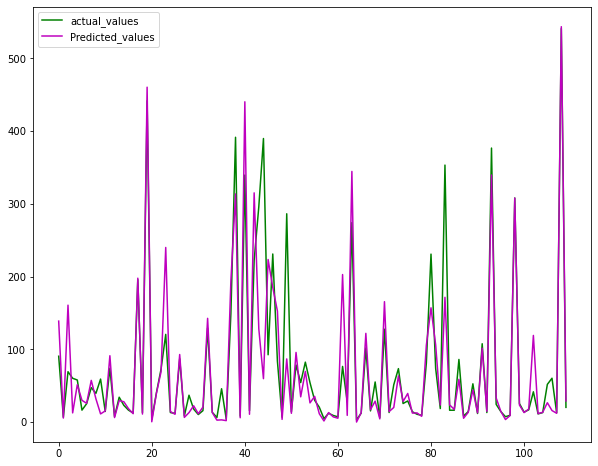

In [70]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [71]:
# importing decision tree using Python
from sklearn.tree import DecisionTreeRegressor

# initializing decision tree using Python model
regressor = DecisionTreeRegressor()

# training decision tree using Python
regressor.fit(X_train,y_train)

# making predictions / decision tree using Python
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

# Evaluating the model
print('R score is :', r2_score(y_test, y_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_pred))

# printing the mean squared error
print(mean_squared_error(y_test, y_pred))

R score is : 0.6153849080344573
24.805181818181815
4580.767435454546


In [72]:
print('R score is :', r2_score(y_train, y_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, y_pred_train))

R score is : 1.0
0.0
0.0


In [77]:
# import Random forest using python
from sklearn.ensemble import RandomForestRegressor

# instantiate Random forest using python
regressor1 = RandomForestRegressor()

# fit Random forest using python model
regressor1.fit(X_train, y_train)

# making predictions for Random forest using python
y_predR = regressor1.predict(X_test)
y_predT = regressor1.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, y_predR))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predR))

# printing the mean squared error
print(mean_squared_error(y_test, y_predR))

R score is : 0.8320106018221669
22.193599999999986
2000.7544705072714


In [78]:
print('R score is :', r2_score(y_train, y_predT))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_predT))
# printing the mean squared error
print(mean_squared_error(y_train, y_predT))

R score is : 0.961189276488764
10.732158662613978
522.9121308440124


In [79]:
# importing the module
from sklearn.ensemble import ExtraTreesRegressor

# initializing the model
regressor2 = ExtraTreesRegressor()

# Training the model
regressor2.fit(X_train, y_train)

# Making predictions
y_predE = regressor2.predict(X_test)
y_pred_trains = regressor2.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, y_predE))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predE))

# printing the mean squared error
print(mean_squared_error(y_test, y_predE))

R score is : 0.8515201188173918
20.58750818181817
1768.3960373619086


In [80]:
print('R score is :', r2_score(y_train, y_pred_trains))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_pred_trains))
# printing the mean squared error
print(mean_squared_error(y_train, y_pred_trains))

R score is : 1.0
1.0636004066670376e-13
4.4411367970244884e-26


In [81]:
# importing the module
import xgboost as xgb

# xgboost regressor
model = xgb.XGBRegressor()

# training the model
model.fit(X_train,y_train)

# making predictions
model_pred = model.predict(X_test)
model_pred_train = model.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, model_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, model_pred))

# printing the mean squared error
print(mean_squared_error(y_test, model_pred))

R score is : 0.8501443791938179
21.975366427681664
1784.7811023241975


In [82]:
print('R score is :', r2_score(y_train, model_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, model_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, model_pred_train))

R score is : 0.9999918655345342
0.21571266646805526
0.10959885014143994


In [83]:
pm10 = data.drop('PM2.5(mcg/m³)', axis=1)
pm10 = pm10.drop('PM1(mcg/m³)', axis = 1)
pm10 = pm10.drop('Day', axis=1)

In [84]:
X_pm = pm10.drop('PM10(mcg/m³)', axis=1)
Y_pm = pm10['PM10(mcg/m³)']

In [85]:
# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X_pm, Y_pm, test_size=0.25, random_state=0)


# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

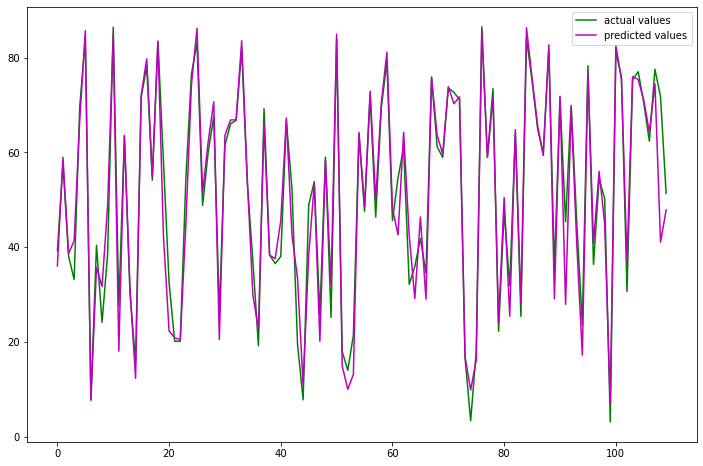

In [86]:
# Making predictions
reg_pred = model_reg.predict(X_test)


# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [87]:
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.9335898096026211


In [88]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, reg_pred))

# printing the mean squared error
print(mean_squared_error(y_test, reg_pred))

3.6777532528294654
32.93030742458598


In [89]:
# Making predictions
reg_pred_train = model_reg.predict(X_train)

In [90]:
print('R score is :', r2_score(y_train, reg_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, reg_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, reg_pred_train))

R score is : 0.978130517654847
1.935405575852437
11.519967200783183


In [91]:
# initializing the CatBoost regressor
CatBoost_rg = CatBoostRegressor()

# training the catboost Regressor model
CatBoost_rg.fit(X_train, y_train)

catboost_pred = CatBoost_rg.predict(X_test)
catboost_pred_train = CatBoost_rg.predict(X_train)

Learning rate set to 0.034348
0:	learn: 22.3615496	total: 1.1ms	remaining: 1.1s
1:	learn: 21.7684974	total: 2.15ms	remaining: 1.07s
2:	learn: 21.2099516	total: 3.11ms	remaining: 1.03s
3:	learn: 20.7083605	total: 4.05ms	remaining: 1.01s
4:	learn: 20.2089433	total: 29.1ms	remaining: 5.78s
5:	learn: 19.6756231	total: 30.6ms	remaining: 5.07s
6:	learn: 19.1501440	total: 33ms	remaining: 4.68s
7:	learn: 18.7052511	total: 34.2ms	remaining: 4.24s
8:	learn: 18.2578720	total: 38.4ms	remaining: 4.23s
9:	learn: 17.8524962	total: 41.1ms	remaining: 4.07s
10:	learn: 17.4020217	total: 44.1ms	remaining: 3.97s
11:	learn: 16.9992769	total: 47.7ms	remaining: 3.93s
12:	learn: 16.5938067	total: 49.8ms	remaining: 3.78s
13:	learn: 16.2092018	total: 51.1ms	remaining: 3.6s
14:	learn: 15.8534734	total: 52.1ms	remaining: 3.42s
15:	learn: 15.4821121	total: 52.9ms	remaining: 3.25s
16:	learn: 15.0994892	total: 53.5ms	remaining: 3.1s
17:	learn: 14.7525131	total: 54.3ms	remaining: 2.96s
18:	learn: 14.4069598	total: 55m

192:	learn: 3.5650318	total: 178ms	remaining: 745ms
193:	learn: 3.5571592	total: 179ms	remaining: 743ms
194:	learn: 3.5474054	total: 179ms	remaining: 741ms
195:	learn: 3.5351002	total: 180ms	remaining: 739ms
196:	learn: 3.5293773	total: 181ms	remaining: 737ms
197:	learn: 3.5195602	total: 181ms	remaining: 735ms
198:	learn: 3.5125317	total: 182ms	remaining: 733ms
199:	learn: 3.5094793	total: 183ms	remaining: 731ms
200:	learn: 3.5015507	total: 183ms	remaining: 729ms
201:	learn: 3.4903759	total: 184ms	remaining: 726ms
202:	learn: 3.4811253	total: 184ms	remaining: 724ms
203:	learn: 3.4757037	total: 185ms	remaining: 722ms
204:	learn: 3.4634374	total: 186ms	remaining: 720ms
205:	learn: 3.4500681	total: 186ms	remaining: 717ms
206:	learn: 3.4400919	total: 187ms	remaining: 715ms
207:	learn: 3.4365401	total: 188ms	remaining: 716ms
208:	learn: 3.4269230	total: 189ms	remaining: 714ms
209:	learn: 3.4220414	total: 189ms	remaining: 712ms
210:	learn: 3.4162173	total: 190ms	remaining: 710ms
211:	learn: 

485:	learn: 2.0273237	total: 367ms	remaining: 389ms
486:	learn: 2.0262714	total: 368ms	remaining: 388ms
487:	learn: 2.0250157	total: 369ms	remaining: 387ms
488:	learn: 2.0224598	total: 369ms	remaining: 386ms
489:	learn: 2.0150773	total: 370ms	remaining: 385ms
490:	learn: 2.0123066	total: 371ms	remaining: 384ms
491:	learn: 2.0111561	total: 371ms	remaining: 383ms
492:	learn: 2.0074773	total: 372ms	remaining: 383ms
493:	learn: 2.0015621	total: 373ms	remaining: 382ms
494:	learn: 2.0000048	total: 374ms	remaining: 382ms
495:	learn: 1.9993939	total: 375ms	remaining: 381ms
496:	learn: 1.9944328	total: 376ms	remaining: 381ms
497:	learn: 1.9858162	total: 377ms	remaining: 380ms
498:	learn: 1.9840583	total: 377ms	remaining: 379ms
499:	learn: 1.9820295	total: 378ms	remaining: 378ms
500:	learn: 1.9786681	total: 378ms	remaining: 377ms
501:	learn: 1.9773360	total: 379ms	remaining: 376ms
502:	learn: 1.9727182	total: 380ms	remaining: 375ms
503:	learn: 1.9660851	total: 380ms	remaining: 374ms
504:	learn: 

772:	learn: 1.2918073	total: 548ms	remaining: 161ms
773:	learn: 1.2894046	total: 549ms	remaining: 160ms
774:	learn: 1.2877073	total: 551ms	remaining: 160ms
775:	learn: 1.2856168	total: 552ms	remaining: 159ms
776:	learn: 1.2847821	total: 552ms	remaining: 159ms
777:	learn: 1.2805081	total: 553ms	remaining: 158ms
778:	learn: 1.2801846	total: 554ms	remaining: 157ms
779:	learn: 1.2790867	total: 555ms	remaining: 157ms
780:	learn: 1.2788350	total: 556ms	remaining: 156ms
781:	learn: 1.2773334	total: 556ms	remaining: 155ms
782:	learn: 1.2749725	total: 557ms	remaining: 154ms
783:	learn: 1.2739647	total: 558ms	remaining: 154ms
784:	learn: 1.2735257	total: 558ms	remaining: 153ms
785:	learn: 1.2713532	total: 559ms	remaining: 152ms
786:	learn: 1.2679547	total: 560ms	remaining: 152ms
787:	learn: 1.2636606	total: 560ms	remaining: 151ms
788:	learn: 1.2621469	total: 561ms	remaining: 150ms
789:	learn: 1.2619178	total: 563ms	remaining: 150ms
790:	learn: 1.2617192	total: 563ms	remaining: 149ms
791:	learn: 

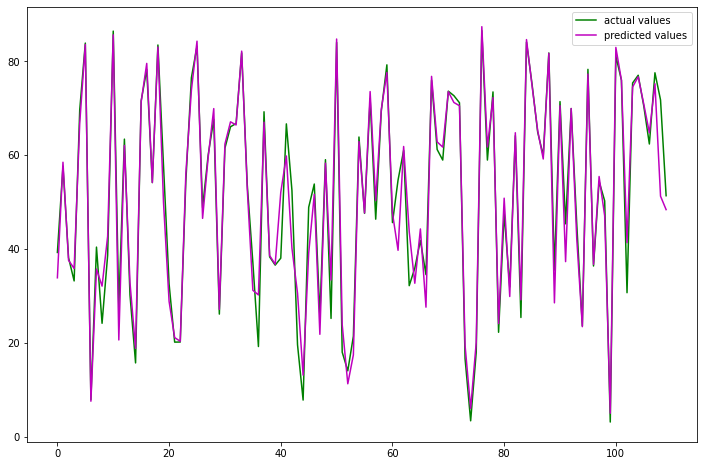

In [92]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],catboost_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [93]:
print('R score is :', r2_score(y_test, catboost_pred))

R score is : 0.9543844431980028


In [94]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, catboost_pred))

# printing the mean squared error
print(mean_squared_error(y_test, catboost_pred))

3.0379878052416505
22.619033311681605


In [95]:
print('R score is :', r2_score(y_train, catboost_pred_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, catboost_pred_train))
# printing the mean squared error
print(mean_squared_error(y_train, catboost_pred_train))

R score is : 0.9982223430049227
0.7211223590997491
0.9363984914838227


In [96]:
# creating neural networks for regression, input layer and output layer
model = tf.keras.Sequential([tf.keras.layers.InputLayer(
    input_shape=7),
    # second hidden layer with 20 nodes
  tf.keras.layers.Dense(20, activation = tf.keras.activations.relu),
   
                             # building hiden layer with 10 nodes
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)])
# second step is to compile neural networks for regression
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
#traing model with 50 epochs 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
11/11 [==============================] - 0s 1ms/step - loss: 63.8601 - mae: 63.8601
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 53.4609 - mae: 53.4609
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 44.3599 - mae: 44.3599
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 37.7256 - mae: 37.7256
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 35.0167 - mae: 35.0167
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 33.4910 - mae: 33.4910
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 32.4837 - mae: 32.4837
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 31.6679 - mae: 31.6679
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 30.8396 - mae: 30.8396
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 29.8860 - mae: 29.8860
Epoch 11/200
11/11 [===================

11/11 [==============================] - 0s 2ms/step - loss: 4.4485 - mae: 4.4485
Epoch 172/200
11/11 [==============================] - 0s 3ms/step - loss: 4.5364 - mae: 4.5364
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3819 - mae: 4.3819
Epoch 174/200
11/11 [==============================] - 0s 3ms/step - loss: 4.3622 - mae: 4.3622
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 4.4314 - mae: 4.4314
Epoch 176/200
11/11 [==============================] - 0s 3ms/step - loss: 4.3763 - mae: 4.3763
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3558 - mae: 4.3558
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3439 - mae: 4.3439
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3685 - mae: 4.3685
Epoch 180/200
11/11 [==============================] - 0s 2ms/step - loss: 4.3112 - mae: 4.3112
Epoch 181/200
11/11 [==============================] -

In [97]:
# making predictions using neural networks for regression
y_preds = model.predict(X_test)
y_preds_train = model.predict(X_train)
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, y_preds))

11/11 [==============================] - 0s 1ms/step
R score is : 0.9193826080668547


In [98]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_squared_error, mean_absolute_error

# printing the mean absolute error
print(mean_absolute_error(y_test, y_preds))

# printing the mean squared error
print(mean_squared_error(y_test, y_preds))

4.223810915535146
39.97512255636581


In [99]:
print('R score is :', r2_score(y_train, y_preds_train))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_preds_train))
# printing the mean squared error
print(mean_squared_error(y_train, y_preds_train))

R score is : 0.9163541093945347
4.270804732135726
44.06130428911711


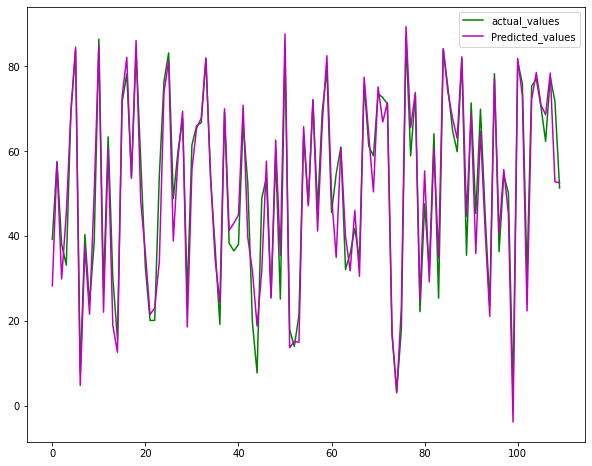

In [72]:
# fitting the size of the plot
plt.figure(figsize=(10, 8))
# plotting training and test
plt.plot([i for i in range(len(y_test))],y_test, label="actual_values", c='g')
plt.plot([i for i in range(len(y_test))],y_preds, label="Predicted_values", c='m')
# showing the plotting
plt.legend()
plt.show()

In [100]:
# importing decision tree using Python
from sklearn.tree import DecisionTreeRegressor

# initializing decision tree using Python model
regressor = DecisionTreeRegressor()

# training decision tree using Python
regressor.fit(X_train,y_train)

# making predictions / decision tree using Python
y_pred = regressor.predict(X_test)
y_pred_t = regressor.predict(X_train)

# Evaluating the model
print('R score is :', r2_score(y_test, y_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_pred))

# printing the mean squared error
print(mean_squared_error(y_test, y_pred))

R score is : 0.9221216234560401
4.0942727272727275
38.616948181818195


In [101]:
print('R score is :', r2_score(y_train, y_pred_t))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_pred_t))
# printing the mean squared error
print(mean_squared_error(y_train, y_pred_t))

R score is : 1.0
0.0
0.0


In [102]:
# import Random forest using python
from sklearn.ensemble import RandomForestRegressor

# instantiate Random forest using python
regressor1 = RandomForestRegressor()

# fit Random forest using python model
regressor1.fit(X_train, y_train)

# making predictions for Random forest using python
y_predR = regressor1.predict(X_test)
y_predT = regressor1.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, y_predR))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predR))

# printing the mean squared error
print(mean_squared_error(y_test, y_predR))

R score is : 0.9437020906666012
3.3879354545454494
27.916008832636358


In [103]:
print('R score is :', r2_score(y_train, y_predT))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_predT))
# printing the mean squared error
print(mean_squared_error(y_train, y_predT))

R score is : 0.9910939977086711
1.3652890577507644
4.691325229696056


In [104]:
# importing the module
from sklearn.ensemble import ExtraTreesRegressor

# initializing the model
regressor2 = ExtraTreesRegressor()

# Training the model
regressor2.fit(X_train, y_train)

# Making predictions
y_predE = regressor2.predict(X_test)
y_predT = regressor2.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, y_predE))

# printing the mean absolute error
print(mean_absolute_error(y_test, y_predE))

# printing the mean squared error
print(mean_squared_error(y_test, y_predE))

R score is : 0.9497483217058058
3.085299999999995
24.91791101527274


In [105]:
print('R score is :', r2_score(y_train, y_predT))
# printing the mean absolute error
print(mean_absolute_error(y_train, y_predT))
# printing the mean squared error
print(mean_squared_error(y_train, y_predT))

R score is : 1.0
6.520214965715e-14
6.874328295989907e-27


In [106]:
# importing the module
import xgboost as xgb

# xgboost regressor
model = xgb.XGBRegressor()

# training the model
model.fit(X_train,y_train)

# making predictions
model_pred = model.predict(X_test)
model_predT = model.predict(X_train)


# Evaluating the model
print('R score is :', r2_score(y_test, model_pred))

# printing the mean absolute error
print(mean_absolute_error(y_test, model_pred))

# printing the mean squared error
print(mean_squared_error(y_test, model_pred))

R score is : 0.9351420519730541
3.739361653934825
32.16060900706953


In [107]:
print('R score is :', r2_score(y_train, model_predT))
# printing the mean absolute error
print(mean_absolute_error(y_train, model_predT))
# printing the mean squared error
print(mean_squared_error(y_train, model_predT))

R score is : 0.9999933823792613
0.04014483841719252
0.003485897501103569


### Forecasting of PM1, PM2.5, PM10

In [58]:
# forecasting for pm1
data.head()

,Day,PM1(mcg/m³),PM10(mcg/m³),PM2.5(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
0,2021-06-20,6.26,58.65,21.02,68.29,0.0,45.87,0.0,0.0,19.76,44.81
1,2021-06-21,5.61,66.03,15.63,56.14,0.0,21.66,0.0,0.0,23.50,37.54
2,2021-06-22,6.38,69.90,11.60,44.30,0.0,20.43,0.0,0.0,23.31,32.35
3,2021-06-23,6.43,69.69,12.40,46.40,0.0,20.18,0.0,0.0,23.28,33.41
4,2021-06-24,5.66,71.40,11.68,45.06,0.0,24.93,0.0,0.0,25.21,34.48


In [131]:
pm1 = data.drop('PM10(mcg/m³)' , axis=1)
pm1 = pm1.drop('PM2.5(mcg/m³)', axis=1)
pm1 = pm1.drop('AQI US', axis=1)
pm1 = pm1.drop('NO2(mcg/m³)', axis=1)
pm1 = pm1.drop('CH2O(mcg/m³)', axis=1)
pm1 = pm1.drop('SO2(mcg/m³)', axis=1)
pm1 = pm1.drop('Temperature(°C)', axis=1)
pm1 = pm1.drop('Humidity(%)', axis=1)
pm1 = pm1.drop('NO(mcg/m³)', axis=1)

pm1.set_index('Day', inplace=True)

In [132]:
pm1.isnull().sum()

PM1(mcg/m³)    0
dtype: int64

In [66]:
# finding the rolling mean and std
mean = pm1.rolling(window=12).mean() 
std = pm1.rolling(window=12).std()

/tmp/ipykernel_315174/2020711727.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Day'], dtype='object')
  mean = pm1.rolling(window=12).mean()
/tmp/ipykernel_315174/2020711727.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Day'], dtype='object')
  std = pm1.rolling(window=12).std()


In [ ]:
# This graphs shows that the data is non-stationary. So, in order to apply the arima model, we have to convert 
# dataset into stationary dataset

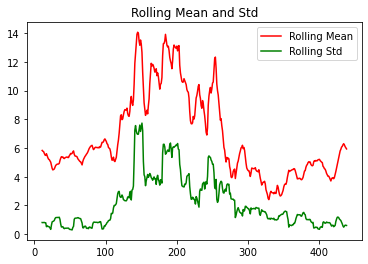

In [68]:
# importing the required modules
import matplotlib.pyplot as plt

#Plot rolling statistics
mean = plt.plot(mean, color='red', label='Rolling Mean')
std = plt.plot(std, color='green', label='Rolling Std')

# labeling the axis
plt.legend(loc='best')
plt.title('Rolling Mean and Std')
plt.show()

In [ ]:
# many possible ways to convert the non-stationary data into stationry, here we are using log scale transforamtion

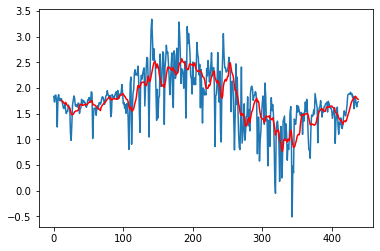

In [71]:
# importing the module
import numpy as np

#Applying the log transformation on Closing price
logScale = np.log(pm1['PM1(mcg/m³)'])

#TFinding the average and std
moving_Average = logScale.rolling(window=12).mean()
moving_STD = logScale.rolling(window=12).std()

# plotting the graph
plt.plot(logScale)
plt.plot(moving_Average, color='red')
plt.show()

In [ ]:
# We currently have the time series’ log(x) values. Therefore, we can construct a function that 
# subtracts the rolling mean and the mean of the log scale, resulting in a constant mean, to make the 
# dataset stationary.

# Let us now transform the time series dataset into the new one.

In [72]:
# # transforming the time series
log_transformed = logScale - moving_Average

#Remove NAN values
log_transformed.dropna(inplace=True)

# printing heading of dataset
log_transformed.head()

11    0.037237
12   -0.019132
13   -0.072921
14   -0.114461
15   -0.090984
Name: PM1(mcg/m³), dtype: float64

In [73]:
# As we now have the transformed time series. Let us now find the rolling mean and std and then will 
# again visualize the time series to see if the data is now stationary.

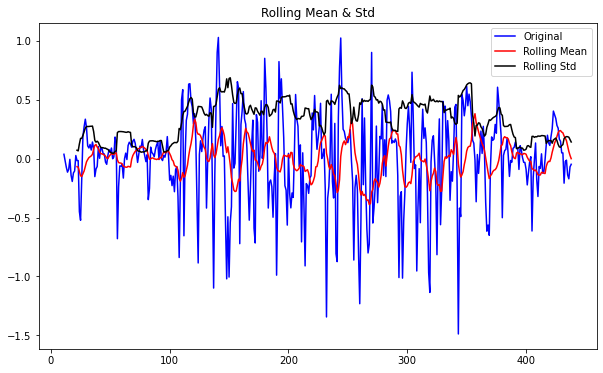

In [74]:
# fixing the size of image
plt.figure(figsize=[10, 6])

# finding the rolling mean and std
movingAverage = log_transformed.rolling(window=12).mean()
movingSTD = log_transformed.rolling(window=12).std()
    
# plotting graph and meaa and std
orig = plt.plot(log_transformed, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# plotting stationary time series data
plt.legend(loc='best')
plt.title('Rolling Mean & Std')
plt.show()

In [75]:
# Timeshift transformation is another method through which we can convert a stationary 
# time series to a non stationary one. Let us first apply the timeshift transformation
# on the time series dataset and then visualize it.

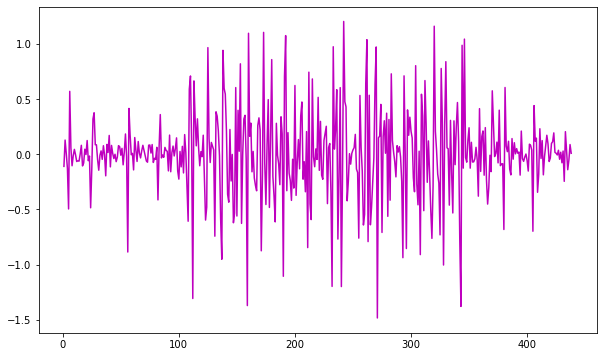

In [76]:
# fixing the size of image
plt.figure(figsize=[10, 6])

#  applynig timeshift transformation
Shifting = logScale - logScale.shift()

# plotting the timeshif 
plt.plot(Shifting , c='m')

# showing the timeshift
plt.show()

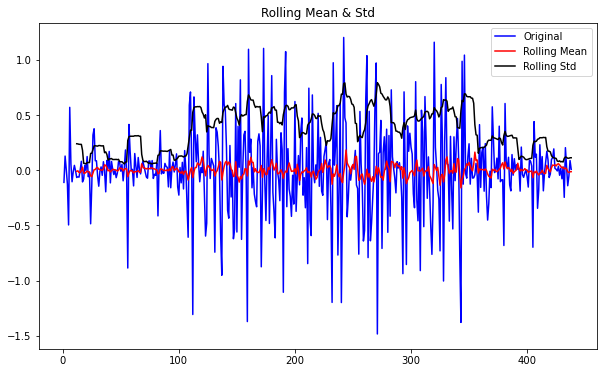

In [77]:
# fixing the size of image
plt.figure(figsize=[10, 6])

#rolling mean of timeshift transformed data
moving_Average = Shifting.rolling(window=12).mean()

# rolling std of timeshift transformed data
moving_STD = Shifting.rolling(window=12).std()
    
#plotting the original data
orig = plt.plot(Shifting, color='blue', label='Original')

# plotting the mean and std of transformed data
mean = plt.plot(moving_Average, color='red', label='Rolling Mean')
std = plt.plot(moving_STD, color='black', label='Rolling Std')

# Labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Std')
plt.show()

In [78]:
# As shown above, the timeshift is perform better than the log transformation method.

In [79]:
# We are now applying two times differentiation to make the data stationary. 

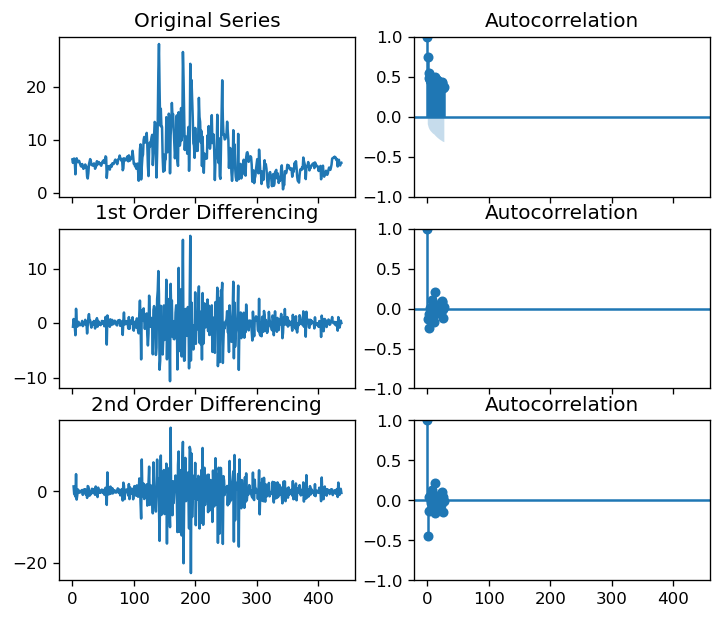

In [86]:
# Importing the modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Size of the time series plots
plt.rcParams.update({'figure.figsize':(7,6), 'figure.dpi':120})


# plotting original time series data
fig, axes = plt.subplots(3, 2, sharex=True)

# labeling the original data
axes[0, 0].plot(pm1['PM1(mcg/m³)']); axes[0, 0].set_title('Original Series')
plot_acf(pm1['PM1(mcg/m³)'], ax=axes[0, 1])

# first differenciating to make the data stationary
axes[1, 0].plot(pm1['PM1(mcg/m³)'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(pm1['PM1(mcg/m³)'].diff().dropna(), ax=axes[1, 1])


# 2nd Differencing
axes[2, 0].plot(pm1['PM1(mcg/m³)'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(pm1['PM1(mcg/m³)'].diff().diff().dropna(), ax=axes[2, 1])
plt.show()
plt.show()

In [87]:
# Based on the above plot, we will take the value of p in arima model as 1 because after first differentiation 
# the data is nearly stationary

In [88]:
# Now we need to find the AR term

/home/student/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


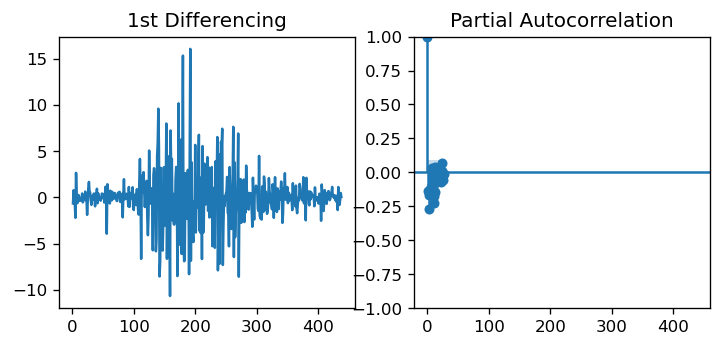

In [89]:
#importing the module
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# partial correlation of first term
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)

# plotting on differen axis
axes[0].plot(pm1['PM1(mcg/m³)'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))

# plotting partial autocorrelation function
plot_pacf(pm1['PM1(mcg/m³)'].diff().dropna(), ax=axes[1])
plt.show()

In [90]:
# We will take order of AR as 1 or 2 or 3 as three values are beyong the shaded area

In [92]:
# Now we need to find the order of MA term

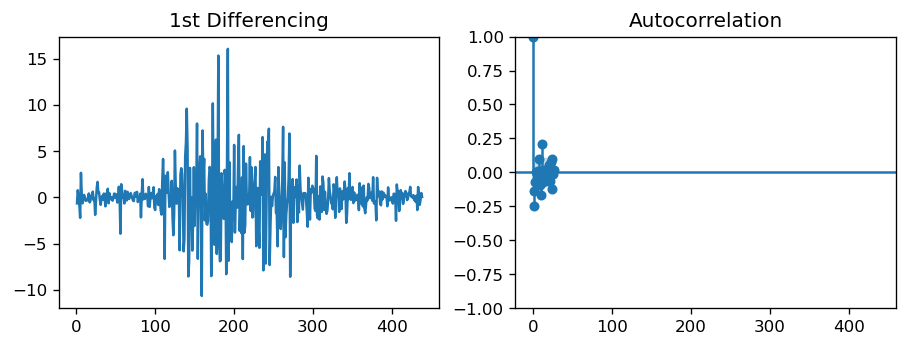

In [93]:
# setting the size
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#  fixing the subplots
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(pm1['PM1(mcg/m³)'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))

# plotting the autocorrelation function
plot_acf(pm1['PM1(mcg/m³)'].diff().dropna(), ax=axes[1])
plt.show()

In [94]:
# again we will take q as 1 or 2 or 3

In [95]:
# so we will take p, d q = (1, 1, 1) or (1, 2, 2), or (1, 3, 3) 

<function matplotlib.pyplot.show(close=None, block=None)>

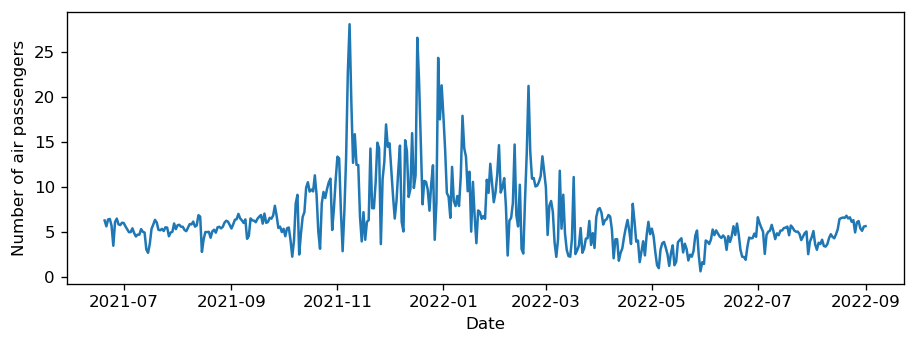

In [112]:
# labeling
plt.xlabel('Date')
plt.ylabel('Number of air passengers')

# plotting
plt.plot(pm1)
plt.show

In [113]:
# importing the module
import numpy as np


#Estimating trend
logScale = np.log(pm1)

In [118]:
#Determine rolling statistics
rolmean = pm1.rolling(window=12).mean() 
rolstd = pm1.rolling(window=12).std()

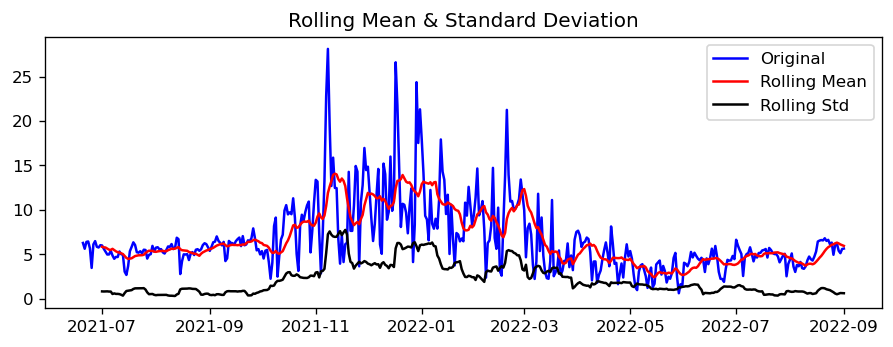

In [119]:
#Plot rolling statistics
orig = plt.plot(pm1, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')

# labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

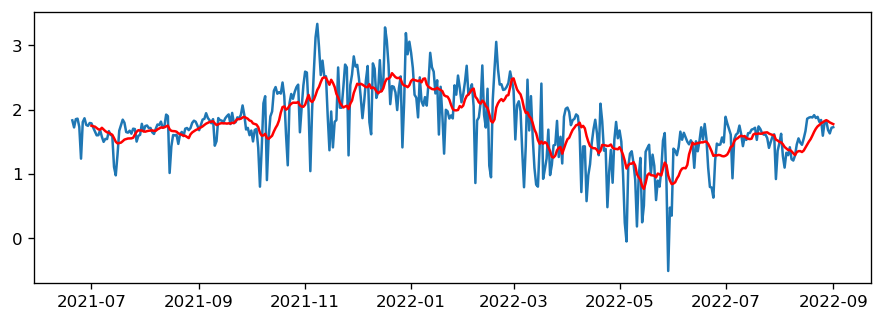

In [121]:
# importing the module
import numpy as np


#Estimating trend
logScale = np.log(pm1)

#The below transformation is required to make series stationary
movingAverage = logScale.rolling(window=12).mean()
movingSTD = logScale.rolling(window=12).std()

# plotting the graph
plt.plot(logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [122]:
# Trasformed dataset
log_transformed = logScale - movingAverage
log_transformed.head(12)

#Remove NAN values
log_transformed.dropna(inplace=True)

# printing heading of dataset
log_transformed.head()

,PM1(mcg/m³)
Day,
2021-07-01,0.037237
2021-07-02,-0.019132
2021-07-03,-0.072921
2021-07-04,-0.114461
2021-07-05,-0.090984


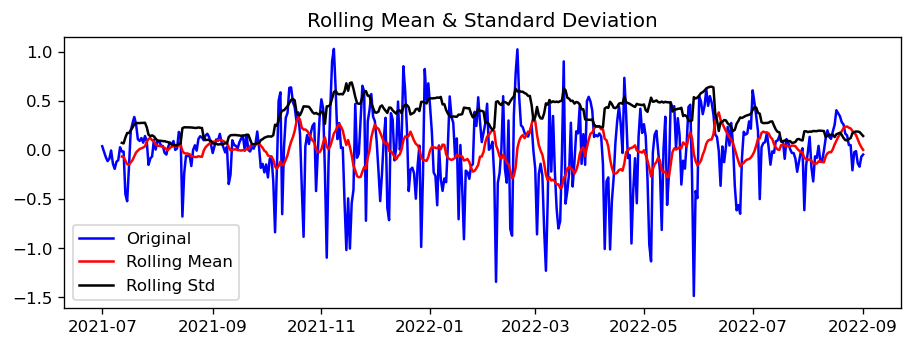

In [123]:
#Determine rolling statistics
movingAverage = log_transformed.rolling(window=12).mean()
movingSTD = log_transformed.rolling(window=12).std()
    
#Plot rolling statistics for the transformed dataset
orig = plt.plot(log_transformed, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')

# plotting stationary time series data
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [133]:
import statsmodels.api as sm

# 2, 1, 2 (arima p d q )
model = sm.tsa.arima.ARIMA(logScale, order=(1,1,1))

# 

# Training process 
model_fit = ARIMA_model.fit()

/home/student/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/student/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/student/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/student/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


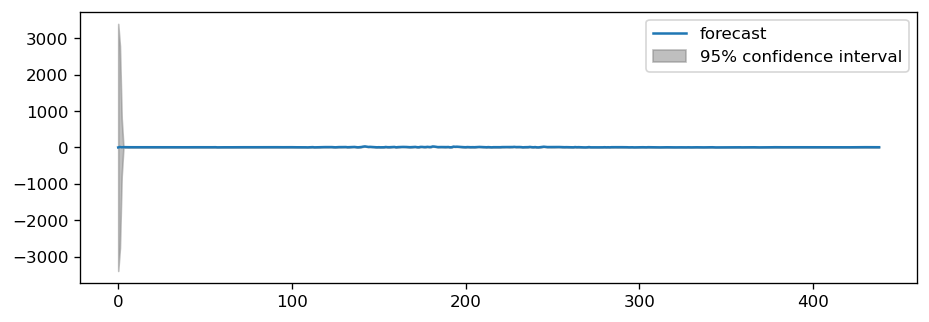

In [135]:
# arima model results
plot_predict(model_fit,dynamic=False)
plt.show()